In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

legend_font = dict(family='Times New Roman', weight='normal', size=22)
ticks_font = dict(family='Times New Roman', weight='normal', size=20)

metrix = ['cumulative_wealth', 'apy', 'sharp_ratio', 'calmar_ratio', 'max_drawdown', 'volatility']
dataset = ['nyse', 'nyse_new', 'sp500', 'djia']
methods = ['ubah', 'up', 'ons', 'eg', 'eg_e', 'eg_r', 'eg_a']
parent_path = 'C:\\Users\\think\\Downloads\\portfolio\\result\\statistic\\eval\\eval-'

def read_metrix(dataset, method):
    if method == 'up':
        path = parent_path + 'dup-' + dataset + '-' + method + '-c=0.csv'
        pd_data = pd.read_csv(path, ',')
        data = pd_data.values[-1][:len(metrix)]
    else:
        path = parent_path + dataset + '-' + method + '-c=0.csv'
        pd_data = pd.read_csv(path, ',')
        data = pd_data.values[0][:len(metrix)]
    data[-1] *= 100
    data[-2] *= 100
    for i in range(len(data)):
        data[i] = format(data[i], '.3f')
    return data


def make_table(dataset):
    data = np.empty((len(methods), len(metrix)))
    for i in range(len(methods)):
        data[i] = read_metrix(dataset, methods[i])
    table = pd.DataFrame(data.T, index=metrix, columns=methods)
    return table


def normalize(array, min=0, max=1):
    '''
    Function:   normalize each metirc
    Input:      array: array (n_metrix, n_method)
                min: float
                max: float
    Output:     res: array (n_method, n_metrix)
    '''
    array[-1], array[-2] = -array[-1], -array[-2]  # reversion for MDD, VO
    for i in range(len(array)):
        a_min, a_max = array[i].min(), array[i].max()
        array[i] = (array[i] - a_min) / (a_max - a_min) * (max - min) + min
    res = array.T
    return res



jia_table = make_table('djia')
data = [[0.764, 0.813, 1.007, 0.808, 0.811, 0.813, 0.814], 
    [-0.125, -0.098, 0.003, -0.101, -0.099, -0.098, -0.097], 
    [-10.766, -8.600, -1.486, -8.816, -8.691, -8.609, -8.533], 
    [-0.324, -0.259, 0.008, -0.266, -0.262, -0.259, -0.257], 
    [38.546, 37.765, 41.596, 37.887, 37.802, 37.788, 37.749], 
    [24.333, 25.430, 39.132, 25.334, 25.387, 25.433, 25.488]]
djia_table = pd.DataFrame(data, columns=methods, index=metrix)
djia_table

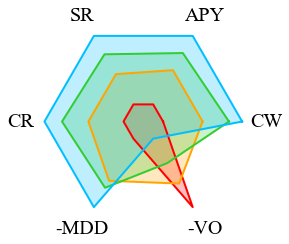

In [21]:
# DJIA
data = normalize(djia_table.loc[:, ['eg', 'eg_e', 'eg_r', 'eg_a']].values, floor, ceil)

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# for i in np.arange(floor, ceil+2, 1):
#     ax.plot(angles, [i] * (len(metrix) + 1), '--', color='k', linewidth=1)
# for i in range(len(metrix)):
#     ax.plot([angles[i], angles[i]], [floor-1, ceil+1], '--', color='k', linewidth=1)

for i in range(len(data)):
    values = data[i]
    values=np.concatenate((values,[values[0]]))
    ax.plot(np.concatenate((angles, [angles[0]])), values, color=color[i], label=label[i], linewidth=2, markersize=8, markeredgewidth=2)
    ax.fill(np.concatenate((angles, [angles[0]])), values, color[i], alpha=0.25)

ax.set_thetagrids(angles * 180/np.pi, feature, family=ticks_font['family'], size=ticks_font['size'])
ax.set_ylim(floor-1, ceil+0.5)
ax.spines['polar'].set_visible(False)
ax.grid(False)
ax.set_yticks([])
# plt.legend(prop=legend_font, bbox_to_anchor=(1.1, 1.0))
plt.savefig('radar_djia.pdf', bbox_inches='tight')